In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [3]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

606

In [6]:
cities

['victoria',
 'khatanga',
 'amderma',
 'rikitea',
 'alofi',
 'barentsburg',
 'ushuaia',
 'punta arenas',
 'albany',
 'castro',
 'ust-kamchatsk',
 'mataura',
 'moree',
 'broome',
 'natal',
 'taolanaro',
 'mocuba',
 'puerto ayora',
 'qaanaaq',
 'geraldton',
 'tessalit',
 'saskylakh',
 'bac lieu',
 'yellowknife',
 'ponta do sol',
 'galesong',
 'hilo',
 'bullhead city',
 'cidreira',
 'mokhotlong',
 'gawler',
 'butaritari',
 'torbay',
 'hualmay',
 'road town',
 'mahibadhoo',
 'severo-kurilsk',
 'port alfred',
 'new norfolk',
 'shimoda',
 'nemuro',
 'hay river',
 'bandarbeyla',
 'qaqortoq',
 'samusu',
 'atuona',
 'rawannawi',
 'oussouye',
 'avera',
 'codrington',
 'zhigansk',
 'atambua',
 'hobart',
 'kavieng',
 'northallerton',
 'pacific grove',
 'voh',
 'kashi',
 'jutai',
 'bredasdorp',
 'boda',
 'san patricio',
 'cape town',
 'enshi',
 'norman wells',
 'bowen',
 'mahebourg',
 'gambela',
 'bethel',
 'benton harbor',
 'jamestown',
 'attawapiskat',
 'les cayes',
 'meulaboh',
 'busselton',
 'm

In [4]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [5]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bb3bd482b43c16567dc89ac5ed2f118b


In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | victoria
Processing Record 2 of Set 1 | khatanga
Processing Record 3 of Set 1 | amderma
City not found. Skipping...
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | alofi
Processing Record 6 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | castro
Processing Record 11 of Set 1 | ust-kamchatsk
City not found. Skipping...
Processing Record 12 of Set 1 | mataura
Processing Record 13 of Set 1 | moree
Processing Record 14 of Set 1 | broome
Processing Record 15 of Set 1 | natal
Processing Record 16 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 17 of Set 1 | mocuba
Processing Record 18 of Set 1 | puerto ayora
Processing Record 19 of Set 1 | qaanaaq
Processing Record 20 of Set 1 | geraldton
Processing Record 21 

Processing Record 35 of Set 4 | laguna
Processing Record 36 of Set 4 | alanya
Processing Record 37 of Set 4 | skelleftea
Processing Record 38 of Set 4 | kemin
Processing Record 39 of Set 4 | avarua
Processing Record 40 of Set 4 | faanui
Processing Record 41 of Set 4 | klyuchi
Processing Record 42 of Set 4 | bratsk
Processing Record 43 of Set 4 | bratunac
Processing Record 44 of Set 4 | ribeira grande
Processing Record 45 of Set 4 | yerofey pavlovich
Processing Record 46 of Set 4 | phan thiet
Processing Record 47 of Set 4 | kruisfontein
Processing Record 48 of Set 4 | xiongzhou
Processing Record 49 of Set 4 | harper
Processing Record 50 of Set 4 | pankrushikha
Processing Record 1 of Set 5 | kpandae
Processing Record 2 of Set 5 | pangoa
Processing Record 3 of Set 5 | liku
Processing Record 4 of Set 5 | george
Processing Record 5 of Set 5 | juegang
Processing Record 6 of Set 5 | clyde river
Processing Record 7 of Set 5 | chemin grenier
Processing Record 8 of Set 5 | thompson
Processing Re

Processing Record 27 of Set 8 | scarborough
Processing Record 28 of Set 8 | hjelset
Processing Record 29 of Set 8 | mudyuga
City not found. Skipping...
Processing Record 30 of Set 8 | yagoua
Processing Record 31 of Set 8 | altay
Processing Record 32 of Set 8 | souillac
Processing Record 33 of Set 8 | la ronge
Processing Record 34 of Set 8 | mbandaka
Processing Record 35 of Set 8 | rizhao
Processing Record 36 of Set 8 | calvinia
Processing Record 37 of Set 8 | petropavlovsk-kamchatskiy
Processing Record 38 of Set 8 | iberia
Processing Record 39 of Set 8 | griffith
Processing Record 40 of Set 8 | luwuk
Processing Record 41 of Set 8 | yenagoa
Processing Record 42 of Set 8 | belaya gora
Processing Record 43 of Set 8 | cabras
Processing Record 44 of Set 8 | viedma
Processing Record 45 of Set 8 | pakenham
Processing Record 46 of Set 8 | louisbourg
City not found. Skipping...
Processing Record 47 of Set 8 | acajutla
Processing Record 48 of Set 8 | sri aman
Processing Record 49 of Set 8 | izvo

Processing Record 11 of Set 12 | san rafael
Processing Record 12 of Set 12 | rumoi
Processing Record 13 of Set 12 | vallenar
Processing Record 14 of Set 12 | ninghai
Processing Record 15 of Set 12 | ciudad bolivar
Processing Record 16 of Set 12 | kununurra
Processing Record 17 of Set 12 | jarjis
City not found. Skipping...
Processing Record 18 of Set 12 | jalu
Processing Record 19 of Set 12 | skjervoy
Processing Record 20 of Set 12 | tagusao
Processing Record 21 of Set 12 | menongue
Processing Record 22 of Set 12 | coahuayana
Processing Record 23 of Set 12 | ous
Processing Record 24 of Set 12 | abu kamal
Processing Record 25 of Set 12 | thiruvananthapuram
Processing Record 26 of Set 12 | sahrak
City not found. Skipping...
Processing Record 27 of Set 12 | eyrarbakki
Processing Record 28 of Set 12 | moses lake
Processing Record 29 of Set 12 | karasjok
Processing Record 30 of Set 12 | stoyba
City not found. Skipping...
Processing Record 31 of Set 12 | adrar
Processing Record 32 of Set 12 

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Victoria,22.2855,114.1577,85.17,87,47,1.01,HK,2022-07-13 21:54:47
1,Khatanga,71.9667,102.5000,43.59,82,100,8.84,RU,2022-07-13 21:56:18
2,Rikitea,-23.1203,-134.9692,72.79,79,89,9.26,PF,2022-07-13 21:56:18
3,Alofi,-19.0595,-169.9187,80.49,69,46,16.11,NU,2022-07-13 21:56:19
4,Ushuaia,-54.8000,-68.3000,35.26,64,75,5.75,AR,2022-07-13 21:51:59
5,Punta Arenas,-53.1500,-70.9167,37.51,81,75,18.41,CL,2022-07-13 21:55:49
6,Albany,42.6001,-73.9662,82.63,48,74,6.60,US,2022-07-13 21:56:19
7,Castro,-24.7911,-50.0119,53.53,95,98,8.90,BR,2022-07-13 21:56:20
8,Mataura,-46.1927,168.8643,42.48,98,100,3.83,NZ,2022-07-13 21:56:20
9,Moree,-29.4667,149.8500,41.47,81,0,13.87,AU,2022-07-13 21:56:20


In [12]:
#reorder columns
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Victoria,HK,2022-07-13 21:54:47,22.2855,114.1577,85.17,87,47,1.01
1,Khatanga,RU,2022-07-13 21:56:18,71.9667,102.5000,43.59,82,100,8.84
2,Rikitea,PF,2022-07-13 21:56:18,-23.1203,-134.9692,72.79,79,89,9.26
3,Alofi,NU,2022-07-13 21:56:19,-19.0595,-169.9187,80.49,69,46,16.11
4,Ushuaia,AR,2022-07-13 21:51:59,-54.8000,-68.3000,35.26,64,75,5.75
...,...,...,...,...,...,...,...,...,...
548,Tamsweg,AT,2022-07-13 22:10:50,47.1281,13.8110,65.59,53,89,2.35
549,Naze,JP,2022-07-13 22:10:50,28.3667,129.4833,79.72,86,99,9.44
550,Ordu,TR,2022-07-13 22:10:51,40.9086,37.6845,61.30,88,51,3.36
551,Bobo Dioulasso,BF,2022-07-13 22:10:51,11.1771,-4.2979,80.29,60,80,5.55


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
#load data from csv so that I dont have to re-pull it from site (can remove when code is finished)
#dont forget to load depens
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from citipy import citipy

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

#----------------------------------------------------------------
#----------------------------------------------------------------
#----------------------------------------------------------------
city_data_df = pd.read_csv("weather_data/cities.csv")
city_data_df

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Victoria,HK,2022-07-13 21:54:47,22.2855,114.1577,85.17,87,47,1.01
1,1,Khatanga,RU,2022-07-13 21:56:18,71.9667,102.5000,43.59,82,100,8.84
2,2,Rikitea,PF,2022-07-13 21:56:18,-23.1203,-134.9692,72.79,79,89,9.26
3,3,Alofi,NU,2022-07-13 21:56:19,-19.0595,-169.9187,80.49,69,46,16.11
4,4,Ushuaia,AR,2022-07-13 21:51:59,-54.8000,-68.3000,35.26,64,75,5.75
...,...,...,...,...,...,...,...,...,...,...
548,548,Tamsweg,AT,2022-07-13 22:10:50,47.1281,13.8110,65.59,53,89,2.35
549,549,Naze,JP,2022-07-13 22:10:50,28.3667,129.4833,79.72,86,99,9.44
550,550,Ordu,TR,2022-07-13 22:10:51,40.9086,37.6845,61.30,88,51,3.36
551,551,Bobo Dioulasso,BF,2022-07-13 22:10:51,11.1771,-4.2979,80.29,60,80,5.55


In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [15]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'07/14/22'

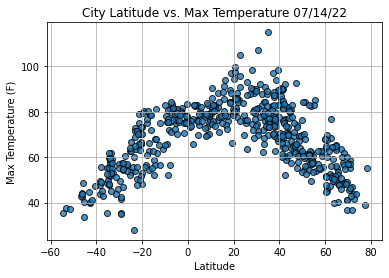

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

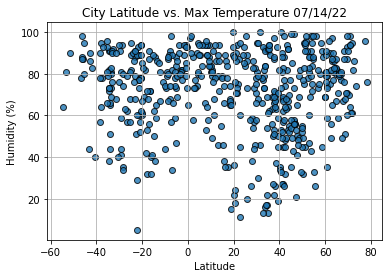

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

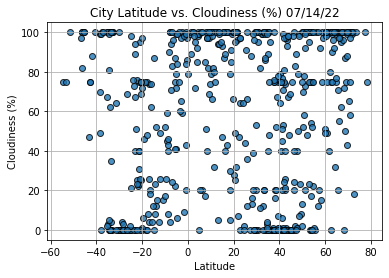

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

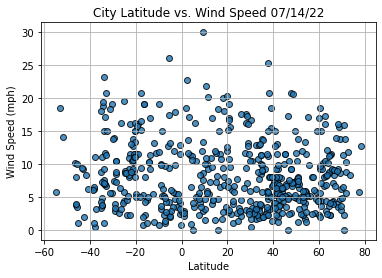

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [22]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [24]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

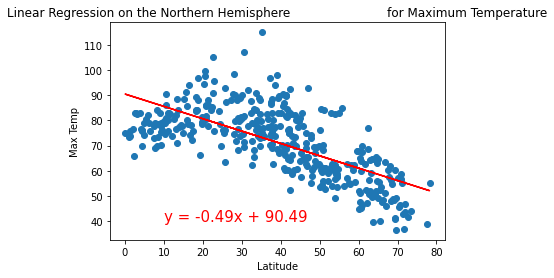

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

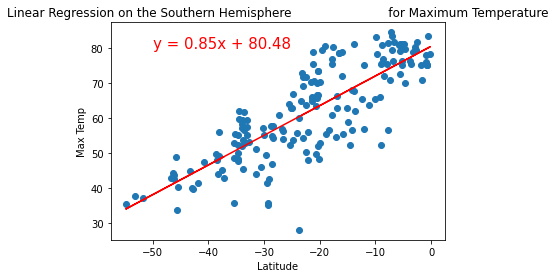

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,80))

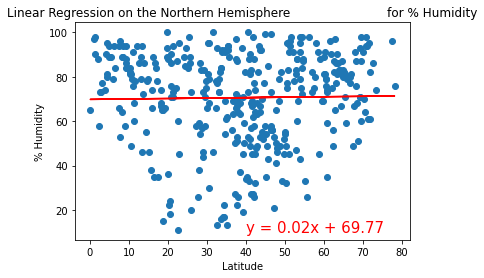

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

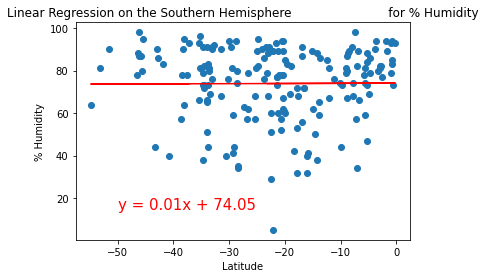

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

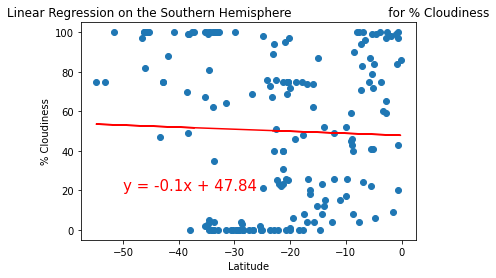

In [39]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,20))

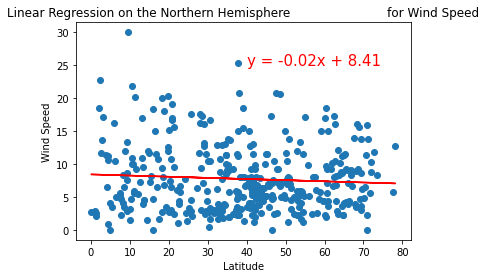

In [38]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,25))

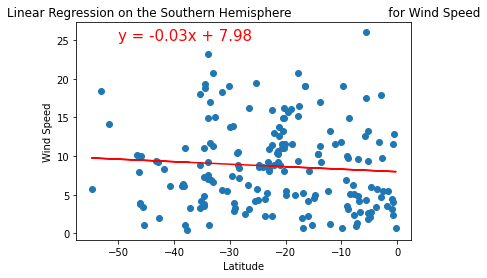

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,25))